In [16]:
#K Nearest Neighbors and decision tree with Python
#Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd
import numpy as np


In [8]:
#This data set has completely random columns with no context to anything just like any company would provide you with during an Interview
#Load the Data Classified Data
df=pd.read_csv('/Users/alidogar/Downloads/KNN_Data.txt')
df

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [18]:
df=df.drop('Unnamed: 0', axis=1)

In [20]:
df.shape

(1000, 11)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB



Because the **KNN** classifier predicts the class of a given test observation
by identifying the observations that are nearest to it, the scale of the
variables matters. Any variables that are on a large scale will have a much
larger effect on the distance between the observations, and hence on the KNN
classifier, than variables that are on a small scale.

In [209]:
Y=df['TARGET CLASS']
X=df.drop('TARGET CLASS', axis=1)

In [212]:
from sklearn.preprocessing import StandardScaler
#Standardize the input Variables, don't include TARGET CLASS in input dataframe
scaler=StandardScaler()

scaled_features= scaler.fit_transform(X)
df_scalar=pd.DataFrame(scaled_features)
df_scalar

,0,1,2,3,4,5,6,7,8,9
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [214]:
#Train-Test Split
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y= train_test_split(scaled_features,Y,test_size=0.25,random_state=51)

In [216]:
## Using KNN
#Remember that we are trying to come up with a model to predict class label for test observation. We'll start with k=1.
from sklearn.neighbors import KNeighborsClassifier
k=1
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(train_x, train_y)


KNeighborsClassifier(n_neighbors=1)

In [218]:
y_pred = knn.predict(test_x)

In [230]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report, mean_absolute_error
cm = metrics.confusion_matrix(test_y, y_pred)

print(cm)
print(classification_report(test_y, y_pred))

[[113   9]
 [ 10 118]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       122
           1       0.93      0.92      0.93       128

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [222]:
#Predicting and evavluations
#Let's evaluate our knn model.
from sklearn import metrics

#[[125  18]
# [ 13 144]]

print(classification_report(y_test,pred))

        precision    recall  f1-score   support

         0       0.91      0.87      0.89       143
         1       0.89      0.92      0.90       157
         Total   0.90      0.90      0.90       300

Text(0, 0.5, 'Error Rate')

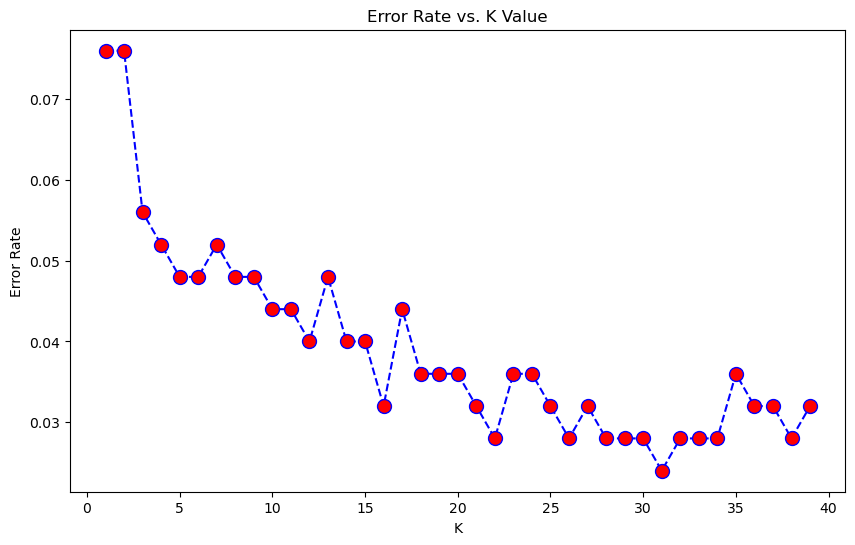

In [232]:
#Let's go ahead and use the elbow method to pick a good K Value:

error_rate = []


# Will take some time

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(train_x, train_y)
    
    y_pred = knn.predict(test_x)
    
    error_rate.append(mean_absolute_error(test_y, y_pred))

plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')

plt.xlabel('K')

plt.ylabel('Error Rate')

In [240]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(train_x, train_y)

y_pred = knn.predict(test_x)
print('WITH K=1')
print('\n')
print(confusion_matrix(test_y,y_pred))
print('\n')
print(classification_report(test_y,y_pred))

WITH K=1


[[113   9]
 [ 10 118]]


              precision    recall  f1-score   support

           0       0.92      0.93      0.92       122
           1       0.93      0.92      0.93       128

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [236]:
# NOW WITH K=23

knn = KNeighborsClassifier(n_neighbors= 23)
knn.fit(train_x, train_y)

y_pred = knn.predict(test_x)

print('WITH K=23')
print('\n')
print(confusion_matrix(test_y,y_pred))
print('\n')
print(classification_report(test_y,y_pred))

WITH K=23


[[115   7]
 [  2 126]]


              precision    recall  f1-score   support

           0       0.98      0.94      0.96       122
           1       0.95      0.98      0.97       128

    accuracy                           0.96       250
   macro avg       0.97      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

